## Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the csv file
df = pd.read_csv("../data/cleaned_properties.csv")

# Display the head
display(df.head())
df.shape
df.columns


,price,property_type,subproperty_type,region,province,locality,zip_code,construction_year,total_area_sqm,surface_land_sqm,...,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,1963.0,100.0,NaN,...,0,0.0,0,0,NaN,231.0,C,GAS,1,922.0
1,449000.0,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,NaN,NaN,680.0,...,0,0.0,0,0,NaN,221.0,C,NaN,1,406.0
2,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,NaN,142.0,NaN,...,0,0.0,0,1,AS_NEW,NaN,NaN,GAS,0,NaN
3,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,2024.0,187.0,505.0,...,0,0.0,0,1,NaN,99.0,A,NaN,0,NaN
4,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,2022.0,169.0,NaN,...,1,142.0,0,0,AS_NEW,19.0,A+,GAS,0,NaN


Index(['price', 'property_type', 'subproperty_type', 'region', 'province',
       'locality', 'zip_code', 'construction_year', 'total_area_sqm',
       'surface_land_sqm', 'nbr_frontages', 'nbr_bedrooms', 'equipped_kitchen',
       'fl_furnished', 'fl_open_fire', 'fl_terrace', 'terrace_sqm',
       'fl_garden', 'garden_sqm', 'fl_swimming_pool', 'fl_floodzone',
       'state_building', 'primary_energy_consumption_sqm', 'epc',
       'heating_type', 'fl_double_glazing', 'cadastral_income'],
      dtype='object')

## Filtering the data

In [3]:
# Filter the DataFrame for values APARTMENT and APARTMENT_BLOCK
df_house1 = df[df["property_type"] == "HOUSE"]
df_house2 = df_house1[df_house1['subproperty_type'] != 'APARTMENT_BLOCK']

df_house = df[(df["property_type"] == "HOUSE") & (df['subproperty_type'] != 'APARTMENT_BLOCK')]

df_house.head()
print(df_house.info())
print(df_house.shape)

df_house["subproperty_type"].unique()
print(df_house["locality"].unique())
df_house.isna().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
Index: 37211 entries, 1 to 75506
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           37211 non-null  float64
 1   property_type                   37211 non-null  object 
 2   subproperty_type                37211 non-null  object 
 3   region                          37211 non-null  object 
 4   province                        37211 non-null  object 
 5   locality                        37211 non-null  object 
 6   zip_code                        37211 non-null  int64  
 7   construction_year               19969 non-null  float64
 8   total_area_sqm                  32360 non-null  float64
 9   surface_land_sqm                37211 non-null  float64
 10  nbr_frontages                   29563 non-null  float64
 11  nbr_bedrooms                    37211 non-null  float64
 12  equipped_kitchen                20753

construction_year                 17242
cadastral_income                  17168
equipped_kitchen                  16458
heating_type                      13276
state_building                    11529
primary_energy_consumption_sqm    10070
terrace_sqm                        8818
epc                                8721
nbr_frontages                      7648
total_area_sqm                     4851
garden_sqm                         2361
fl_double_glazing                     0
fl_floodzone                          0
fl_swimming_pool                      0
fl_garden                             0
price                                 0
fl_terrace                            0
fl_open_fire                          0
property_type                         0
nbr_bedrooms                          0
surface_land_sqm                      0
zip_code                              0
locality                              0
province                              0
region                                0


## Data types of df_house

In [4]:
# List of df_house columns
column_list = df_house.columns.to_list()
print(column_list)

['price', 'property_type', 'subproperty_type', 'region', 'province', 'locality', 'zip_code', 'construction_year', 'total_area_sqm', 'surface_land_sqm', 'nbr_frontages', 'nbr_bedrooms', 'equipped_kitchen', 'fl_furnished', 'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm', 'fl_swimming_pool', 'fl_floodzone', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'fl_double_glazing', 'cadastral_income']


In [5]:
data_object = df_house.select_dtypes(include='object')
data_float = df_house.select_dtypes(include='float64')
data_int = df_house.select_dtypes(include='int64')

In [6]:
object_list = data_object.columns.to_list()
print("objects:", object_list)
int_columns = data_int.columns.to_list()
print("integers:", int_columns)
float = data_float.columns.to_list()
print("float:", float)

objects: ['property_type', 'subproperty_type', 'region', 'province', 'locality', 'equipped_kitchen', 'state_building', 'epc', 'heating_type']
integers: ['zip_code', 'fl_furnished', 'fl_open_fire', 'fl_terrace', 'fl_garden', 'fl_swimming_pool', 'fl_floodzone', 'fl_double_glazing']
float: ['price', 'construction_year', 'total_area_sqm', 'surface_land_sqm', 'nbr_frontages', 'nbr_bedrooms', 'terrace_sqm', 'garden_sqm', 'primary_energy_consumption_sqm', 'cadastral_income']


## Splitting the data

Creating variables X and y: define the target and the feature.

In [7]:
# Name X and y (specific columns=subset(houses))
X = df_house.drop(columns=['price', 'property_type', 'zip_code', 'locality', 'construction_year', 'cadastral_income'])
y = df_house['price']

# Print shape
print("X shape: ", X.shape)
print("y-shape: ", y.shape)

X shape:  (37211, 21)
y-shape:  (37211,)


In [8]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## Imputing and Rescaling categorical data

Convert categorical data to a numerical form using OneHotEncoder

In [9]:
X_train.info()
X_train['province'].unique()

categorical_cols = df.select_dtypes(include='object').columns.tolist()
print(categorical_cols)

<class 'pandas.core.frame.DataFrame'>
Index: 29768 entries, 8081 to 31954
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   subproperty_type                29768 non-null  object 
 1   region                          29768 non-null  object 
 2   province                        29768 non-null  object 
 3   total_area_sqm                  25900 non-null  float64
 4   surface_land_sqm                29768 non-null  float64
 5   nbr_frontages                   23670 non-null  float64
 6   nbr_bedrooms                    29768 non-null  float64
 7   equipped_kitchen                16580 non-null  object 
 8   fl_furnished                    29768 non-null  int64  
 9   fl_open_fire                    29768 non-null  int64  
 10  fl_terrace                      29768 non-null  int64  
 11  terrace_sqm                     22712 non-null  float64
 12  fl_garden                       29

In [10]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create a dataframe with a categorical column
data = X_train[['province']]
dfX = X_train

print(type(data))
print(type(X_train))

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the data
one_hot_encoded = encoder.fit_transform(data)

print(one_hot_encoded)

# Convert the encoded data to a dataframe
encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['province']))

# Concatenate the encoded dataframe with the original dataframe
df_encoded = pd.concat([dfX, encoded_df], axis=1)

# Drop categorical columnn
df_encoded.drop('province', axis=1, inplace=True) 

print(df_encoded.columns)
print(df_encoded.info())


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Index(['subproperty_type', 'region', 'total_area_sqm', 'surface_land_sqm',
       'nbr_frontages', 'nbr_bedrooms', 'equipped_kitchen', 'fl_furnished',
       'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm',
       'fl_swimming_pool', 'fl_floodzone', 'state_building',
       'primary_energy_consumption_sqm', 'epc', 'heating_type',
       'fl_double_glazing', 'province_Antwerp', 'province_Brussels',
       'province_East Flanders', 'province_Flemish Brabant',
       'province_Hainaut', 'province_Limburg', 'province_Liège',
       'province_Luxembourg', 'province_Namur', 'province_Walloon Brabant',
       'province_West Flanders'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 47794 entries, 8081 to 29767
Data columns

- encoder.fit_transform(X_train[['province']])
- .fit_transform == .fit & .transform

In [11]:
# Handle NaN values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')  # Fill NaN values with most frequent value
encoded_data_imputed = imputer.fit_transform(one_hot_encoded)

## Exploratory Data Analysis

In [12]:
df_corr = df_encoded.drop(columns=['subproperty_type', 'region', 'equipped_kitchen', 'state_building', 'epc', 'heating_type'])
display(df_corr.corr())

,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,fl_furnished,fl_open_fire,fl_terrace,terrace_sqm,fl_garden,garden_sqm,...,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,province_Limburg,province_Liège,province_Luxembourg,province_Namur,province_Walloon Brabant,province_West Flanders
total_area_sqm,1.000000,0.069194,0.088671,0.266279,0.030529,0.025038,0.011684,0.061159,-0.011756,0.056045,...,0.009947,0.007806,0.001629,-0.001196,-0.000474,-0.000055,-0.003009,0.031361,-0.009385,-0.018488
surface_land_sqm,0.069194,1.000000,0.086255,0.073395,0.006818,0.024082,-0.002475,0.015481,-0.002352,0.172990,...,0.004735,0.013115,0.012737,-0.007848,-0.003177,0.005805,-0.007326,0.010324,-0.008975,-0.019473
nbr_frontages,0.088671,0.086255,1.000000,0.075038,0.023137,0.056725,0.010315,0.060713,0.009718,0.107553,...,-0.004117,-0.008039,0.005254,0.035556,0.004588,-0.012250,0.003598,-0.013114,-0.006993,0.003164
nbr_bedrooms,0.266279,0.073395,0.075038,1.000000,0.044564,0.031162,0.056660,0.047485,0.032079,0.057498,...,-0.004498,0.003679,-0.007130,0.013743,0.010960,-0.000782,-0.000800,-0.001594,-0.004226,-0.004289
fl_furnished,0.030529,0.006818,0.023137,0.044564,1.000000,0.015280,0.052902,0.042097,0.023009,0.007570,...,-0.008059,0.004369,0.012213,-0.011266,-0.002415,0.001586,-0.012975,-0.004850,0.014842,-0.011253
fl_open_fire,0.025038,0.024082,0.056725,0.031162,0.015280,1.000000,0.050278,0.030278,0.204839,0.032142,...,-0.003483,0.001430,-0.002946,-0.007982,0.007331,0.000133,-0.002990,-0.009173,0.003486,0.007060
fl_terrace,0.011684,-0.002475,0.010315,0.056660,0.052902,0.050278,1.000000,0.347580,0.259951,0.067183,...,-0.001975,0.001295,0.006269,0.001922,-0.003311,0.014029,-0.002175,0.001040,-0.009118,-0.016947
terrace_sqm,0.061159,0.015481,0.060713,0.047485,0.042097,0.030278,0.347580,1.000000,0.159750,0.135652,...,-0.008553,-0.004344,-0.002949,0.030260,-0.002624,-0.002502,0.014204,0.012794,-0.007007,-0.017823
fl_garden,-0.011756,-0.002352,0.009718,0.032079,0.023009,0.204839,0.259951,0.159750,1.000000,0.198120,...,0.005476,0.004812,-0.002967,-0.006591,-0.001922,0.006657,-0.001526,0.007683,-0.003778,-0.002237
garden_sqm,0.056045,0.172990,0.107553,0.057498,0.007570,0.032142,0.067183,0.135652,0.198120,1.000000,...,-0.002958,0.006556,-0.007308,-0.002176,-0.003839,0.000045,-0.006379,0.036630,-0.005302,-0.001317


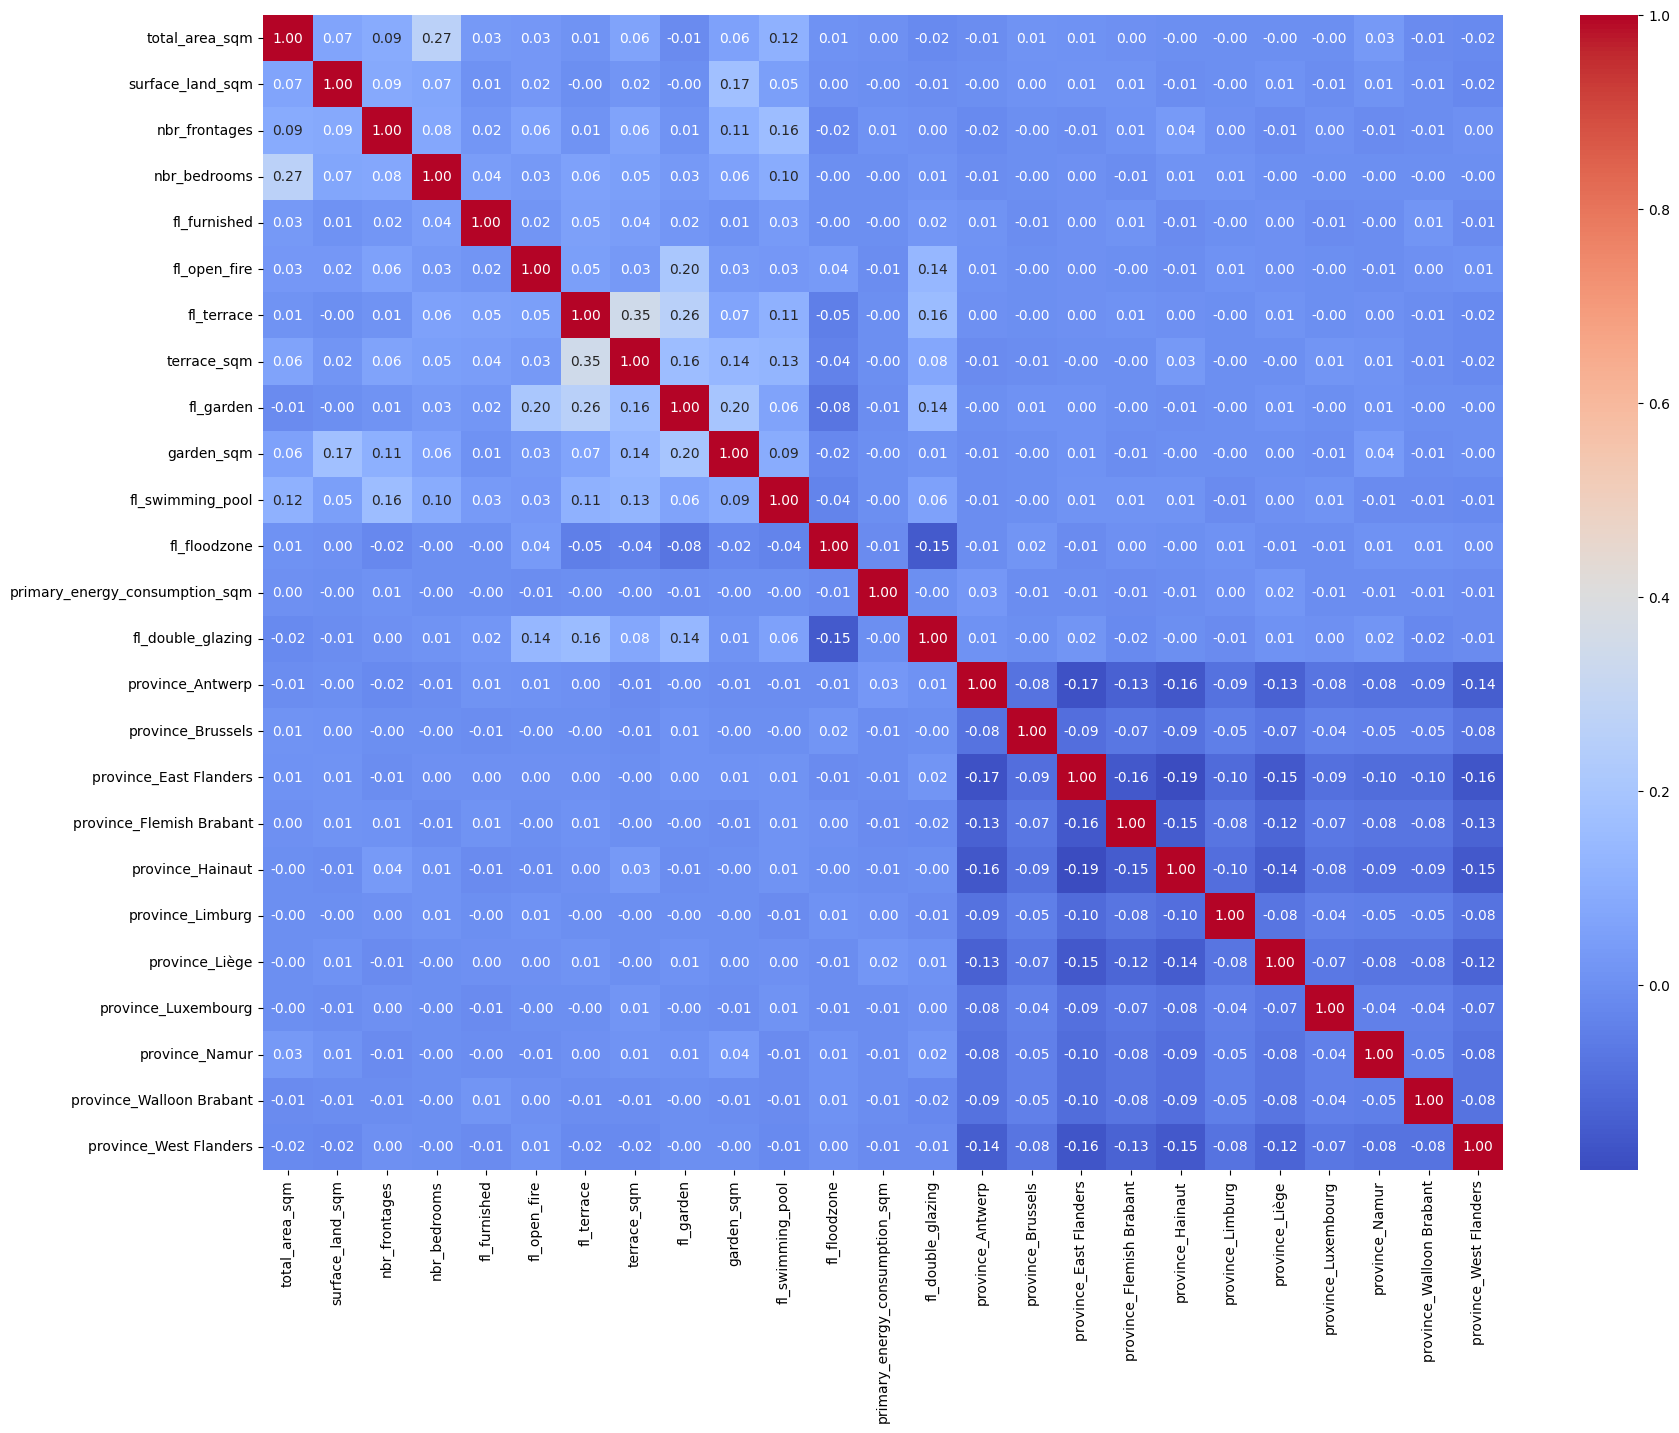

In [13]:
# Create the correlation matrix and represent it as a heatmap.
plt.figure(figsize=(20, 15))
sns.heatmap(df_corr.corr(), annot = True, cmap = 'coolwarm', fmt=".2f")
plt.show()

## Imputing numerical featres with mean

In [14]:
# Drop columns with dtype=object
object_cols = X_train.select_dtypes(include='object').columns
X_train.drop(object_cols, axis=1, inplace=True)
X_train.isna().sum().sort_values(ascending=False)

primary_energy_consumption_sqm    8094
terrace_sqm                       7056
nbr_frontages                     6098
total_area_sqm                    3868
garden_sqm                        1853
surface_land_sqm                     0
nbr_bedrooms                         0
fl_furnished                         0
fl_open_fire                         0
fl_terrace                           0
fl_garden                            0
fl_swimming_pool                     0
fl_floodzone                         0
fl_double_glazing                    0
dtype: int64

In [15]:
# See unique values in dataframe
for column in X_train.columns:
    unique_values = X_train[column].unique()
    print(f"Unique values in column '{column}' is : {unique_values}")

Unique values in column 'total_area_sqm' is : [1.5900e+02 1.0800e+02 1.3000e+02        nan 1.2000e+02 2.5000e+02
 1.4700e+02 1.2500e+02 1.2300e+02 1.4100e+02 2.6500e+02 1.6400e+02
 1.9800e+02 1.5000e+02 1.4500e+02 1.4000e+02 1.8300e+02 2.1200e+02
 2.6000e+02 1.3300e+02 1.7800e+02 2.8000e+02 1.4400e+02 2.6200e+02
 5.5600e+02 2.1300e+02 5.6000e+01 1.8200e+02 2.1000e+02 1.7600e+02
 1.4300e+02 1.4900e+02 3.1400e+02 9.4000e+01 1.0000e+02 1.6200e+02
 2.0300e+02 4.7000e+02 1.3700e+02 3.4400e+02 4.9500e+02 1.2200e+02
 1.4600e+02 1.9000e+02 1.7200e+02 7.0600e+02 2.0900e+02 1.3100e+02
 9.0000e+01 1.1800e+02 8.0000e+02 2.6400e+02 1.2800e+02 2.3800e+02
 1.1000e+02 3.0300e+02 2.7000e+02 3.0800e+02 2.1400e+02 1.5600e+02
 2.4300e+02 1.6700e+02 2.1500e+02 2.4700e+02 2.2300e+02 1.0200e+02
 2.2000e+02 1.8010e+03 2.2200e+02 1.9500e+02 2.6600e+02 1.6100e+02
 1.4800e+02 1.6800e+02 3.4000e+02 5.0000e+01 1.3200e+02 1.3600e+02
 1.1300e+02 7.0000e+01 1.1500e+02 2.4200e+02 1.5300e+02 3.0000e+02
 1.6900e+02 1.75

In [25]:
# Instantiate SimpleImputer with strategy='mean' to impute NaN values with the mean
imputer = SimpleImputer(strategy='median')

# Fit and transform the data using SimpleImputer
X_train['total_area_sqm'] = imputer.fit_transform(X_train[['total_area_sqm']])


print(X_train['total_area_sqm'].unique())


[1.5900e+02 1.0800e+02 1.3000e+02 1.7600e+02 1.2000e+02 2.5000e+02
 1.4700e+02 1.2500e+02 1.2300e+02 1.4100e+02 2.6500e+02 1.6400e+02
 1.9800e+02 1.5000e+02 1.4500e+02 1.4000e+02 1.8300e+02 2.1200e+02
 2.6000e+02 1.3300e+02 1.7800e+02 2.8000e+02 1.4400e+02 2.6200e+02
 5.5600e+02 2.1300e+02 5.6000e+01 1.8200e+02 2.1000e+02 1.4300e+02
 1.4900e+02 3.1400e+02 9.4000e+01 1.0000e+02 1.6200e+02 2.0300e+02
 4.7000e+02 1.3700e+02 3.4400e+02 4.9500e+02 1.2200e+02 1.4600e+02
 1.9000e+02 1.7200e+02 7.0600e+02 2.0900e+02 1.3100e+02 9.0000e+01
 1.1800e+02 8.0000e+02 2.6400e+02 1.2800e+02 2.3800e+02 1.1000e+02
 3.0300e+02 2.7000e+02 3.0800e+02 2.1400e+02 1.5600e+02 2.4300e+02
 1.6700e+02 2.1500e+02 2.4700e+02 2.2300e+02 1.0200e+02 2.2000e+02
 1.8010e+03 2.2200e+02 1.9500e+02 2.6600e+02 1.6100e+02 1.4800e+02
 1.6800e+02 3.4000e+02 5.0000e+01 1.3200e+02 1.3600e+02 1.1300e+02
 7.0000e+01 1.1500e+02 2.4200e+02 1.5300e+02 3.0000e+02 1.6900e+02
 1.7500e+02 1.4200e+02 3.8500e+02 3.7600e+02 1.1890e+03 9.5000

## Linear Regressor model

In [28]:
# Create regressor and instantiate LinearRegression class
reg = LinearRegression()
print(type(reg))

X_train_reshaped = X_train['total_area_sqm'] .values.reshape(-1,1)
# Train the model with X_train and  y_train
reg.fit(X_train_reshaped, y_train)

# Display score of training model
score = reg.score(X_train_reshaped, y_train)
print(score*100, "%")


<class 'sklearn.linear_model._base.LinearRegression'>
7.8692389705377614 %


In [ ]:
predictions = reg.predict(X_test[['total_area_sqm']])

In [26]:
# Create regressor and instantiate LinearRegression class
reg = LinearRegression()
print(type(reg))

#X_train_reshaped = X_train['total_area_sqm'] .values.reshape(-1,1)
# Train the model with X_train and  y_train
reg.fit(df_encoded, y_train)

# Display score of training model
score = reg.score(X_train_reshaped, y_train)
print(score*100, "%")

<class 'sklearn.linear_model._base.LinearRegression'>


ValueError: could not convert string to float: 'HOUSE'